# Assigment I

## Import Libraries

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve, auc, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from typing import List, Dict
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mstats
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier

## Load & External Data

In [351]:
train_url = 'https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/train.csv'
test_url = 'https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/test.csv'
df = pd.read_csv(train_url)

## Part 1 - Exploring The Data

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


We can clearly see that our data doesnt have missing values, no categorial values (all converted to numbers) and one object datetime that we should convert

In [353]:
df.describe()

season      holiday   workingday      weather         temp  \
count  8164.000000  8164.000000  8164.000000  8164.000000  8164.000000   
mean      2.510289     0.029397     0.683244     1.415483    20.244980   
std       1.117178     0.168928     0.465240     0.631242     7.796018   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    20.500000   
75%       4.000000     0.000000     1.000000     2.000000    26.240000   
max       4.000000     1.000000     1.000000     4.000000    41.000000   

             atemp     humidity    windspeed    pollution     sunlight  \
count  8164.000000  8164.000000  8164.000000  8164.000000  8164.000000   
mean     23.670160    61.835130    12.791334    47.152120    20.245980   
std       8.468725    19.255791     8.213914    72.882602     7.796018   
min       0.760000     0.000000     0.000000     0.000304     0.821000   
25%      16.665000    47.000000     7.001500     3.693188    13.941000   
50%      24.240000    62.000000    12.998000    17.684113    20.501000   
75%      31.060000    77.000000    16.997900    59.257746    26.241000   
max      45.455000   100.000000    56.996900   754.304876    41.001000   

           traffic        count  
count  8164.000000  8164.000000  
mean      0.004986   191.339784  
std       0.006319   181.143178  
min       0.000000     1.000000  
25%       0.000000    41.000000  
50%       0.000242   145.000000  
75%       0.004489   285.000000  
max       0.015615   970.000000

## 1. Visualizations

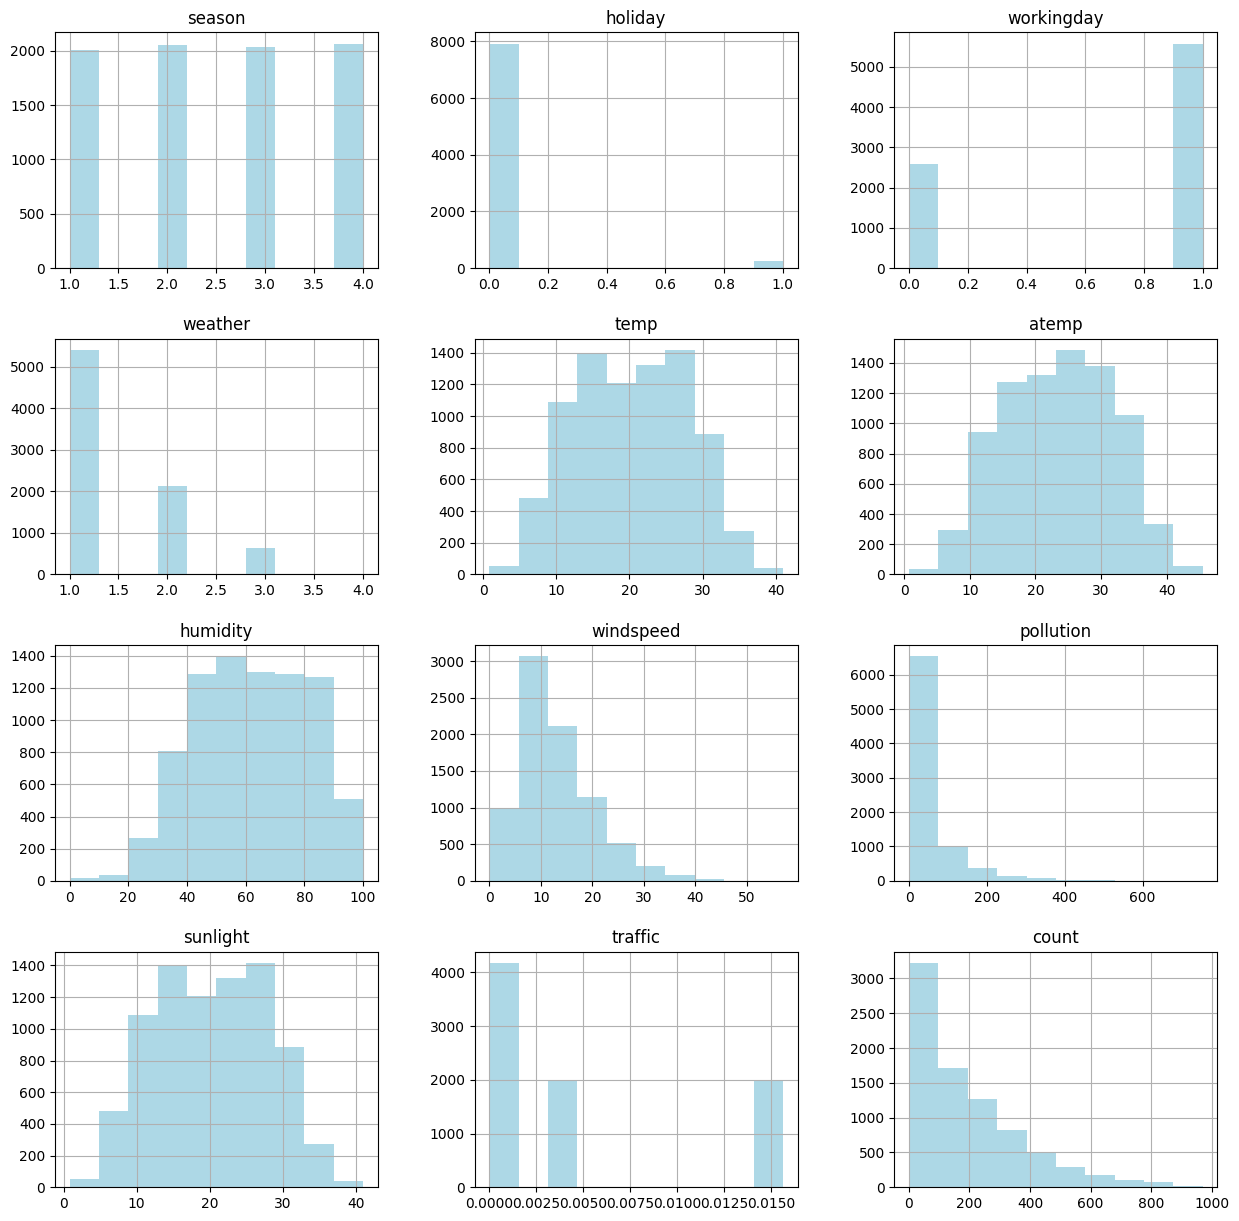

In [356]:
def plot_distribution (data, color):
    """
    input: the train data and a color
    output: plots the feature distribution 
    """
    pd.concat([data],axis=1).hist(figsize=(15,15), color  = color)
    plt.show()

plot_distribution(df, 'lightblue')

Now lets break down the date and time into different components in order to analyze trends/seasonal patterns and more of that.

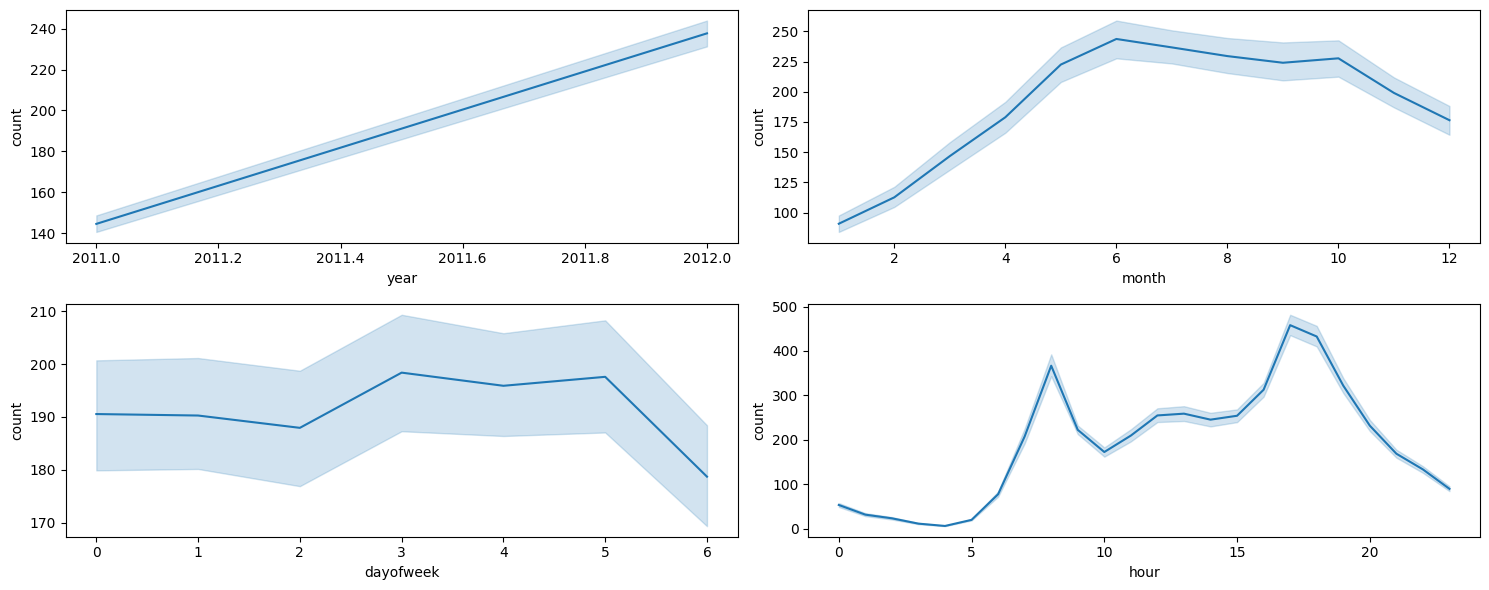

In [357]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# Plotting trends over time
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.lineplot(x='year', y='count', data=df)
plt.subplot(2, 2, 2)
sns.lineplot(x='month', y='count', data=df)
plt.subplot(2, 2, 3)
sns.lineplot(x='dayofweek', y='count', data=df)
plt.subplot(2, 2, 4)
sns.lineplot(x='hour', y='count', data=df)
plt.tight_layout()
plt.show()


In [358]:
def move_columns_to_front(data, columns_to_move):
    """
    Moves specified columns to the beginning of the DataFrame.

    Parameters:
    data (DataFrame): The DataFrame to be modified.
    columns_to_move (list): A list of column names to be moved to the front.

    Returns:
    DataFrame: A DataFrame with specified columns moved to the front.
    """
    # Ensure all columns to move are in the DataFrame
    columns_to_move = [col for col in columns_to_move if col in data.columns]

    # Get the remaining columns and avoid duplication
    remaining_columns = [col for col in data.columns if col not in columns_to_move]

    # Concatenate lists to get new column order
    new_column_order = columns_to_move + remaining_columns

    # Reorder DataFrame
    return data[new_column_order]



new_columns = ['year', 'month', 'day', 'hour', 'dayofweek']
df = move_columns_to_front(df, new_columns)

Now lets check in different weathers the bike rental count

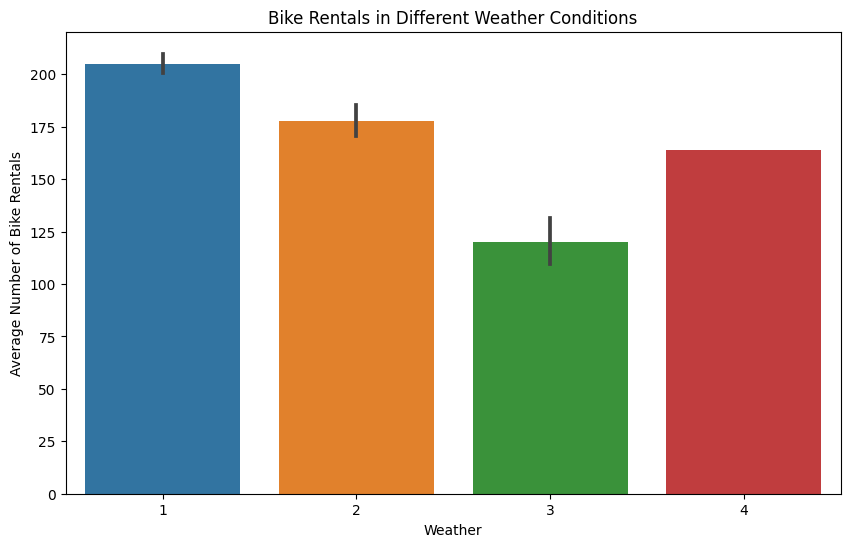

In [359]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=df)
plt.title('Bike Rentals in Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Average Number of Bike Rentals')
plt.show()

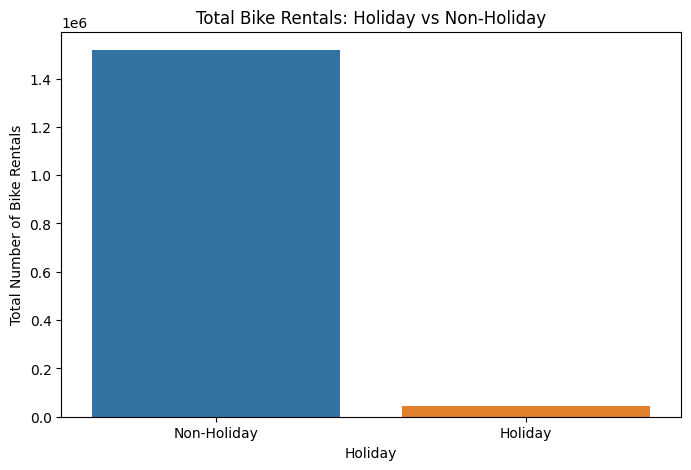

holiday
0    1517865
1      44233
Name: count, dtype: int64


In [360]:
def plot_total_holiday_rental_counts(df, holiday_col='holiday', count_col='count'):
    """
    Plots the total bike rental counts for holidays vs non-holidays.

    :param df: DataFrame containing the bike rental data.
    :param holiday_col: Name of the column indicating holidays.
    :param count_col: Name of the column indicating the count of bike rentals.
    """
    total_counts = df.groupby(holiday_col)[count_col].sum().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=holiday_col, y=count_col, data=total_counts)
    plt.title('Total Bike Rentals: Holiday vs Non-Holiday')
    plt.xlabel('Holiday')
    plt.ylabel('Total Number of Bike Rentals')
    plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
    plt.show()

plot_total_holiday_rental_counts(df)
total_rentals_by_holiday = df.groupby('holiday')['count'].sum()
print(total_rentals_by_holiday)

since there are more non holiday days in the year than holiday it does not make sense to take the count so lets try and see the average per day for each one

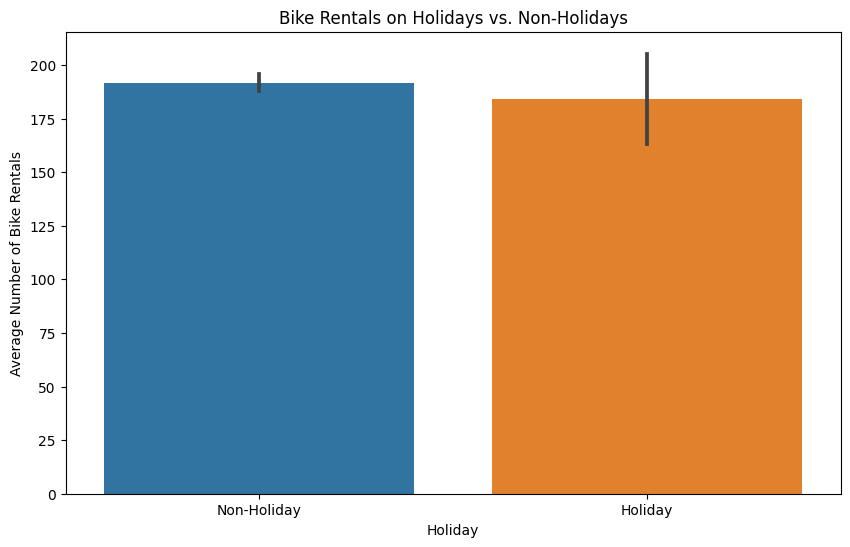

In [361]:
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='count', data=df)
plt.title('Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Average Number of Bike Rentals')
plt.show()

## 2. Feature Correlation 


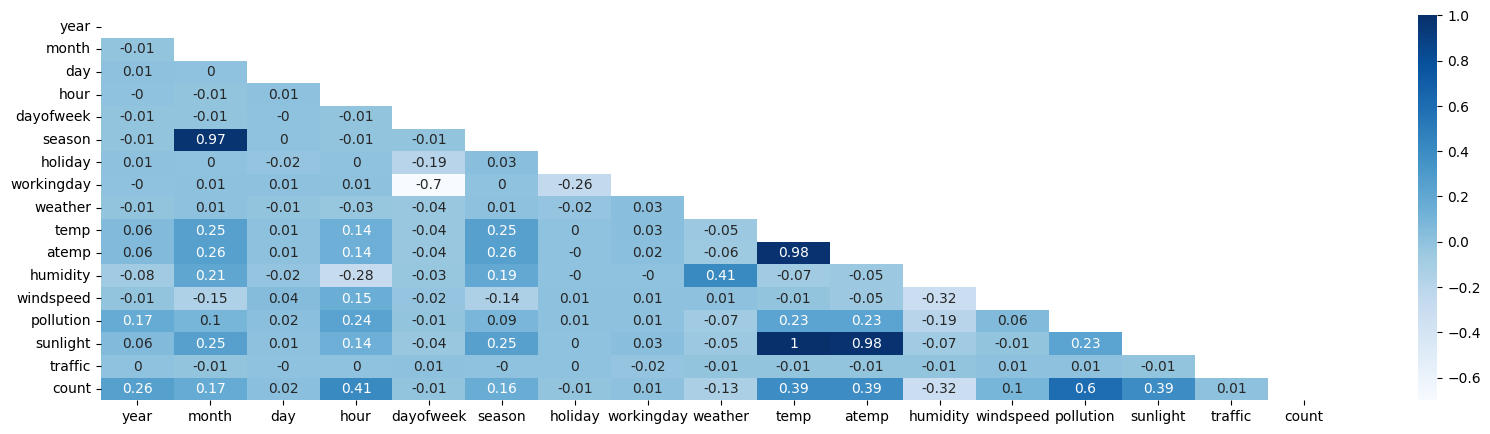

In [323]:
def visualize_correlation_matrix(data):
    """
    Visualizes the correlation matrix of the DataFrame using a heatmap.

    Parameters:
    data (DataFrame): The DataFrame for which the correlation matrix is to be visualized.

    Returns:
    None: Displays a heatmap of the correlation matrix.
    """
    # Calculate the correlation matrix
    corr_mat = data.corr().round(2)

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))

    # Setting up the matplotlib figure
    plt.figure(figsize=(20, 5))

    # Draw the heatmap with the mask
    sns.heatmap(corr_mat, mask=mask, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, cmap='Blues')

    # Display the plot
    plt.show()

visualize_correlation_matrix(df)

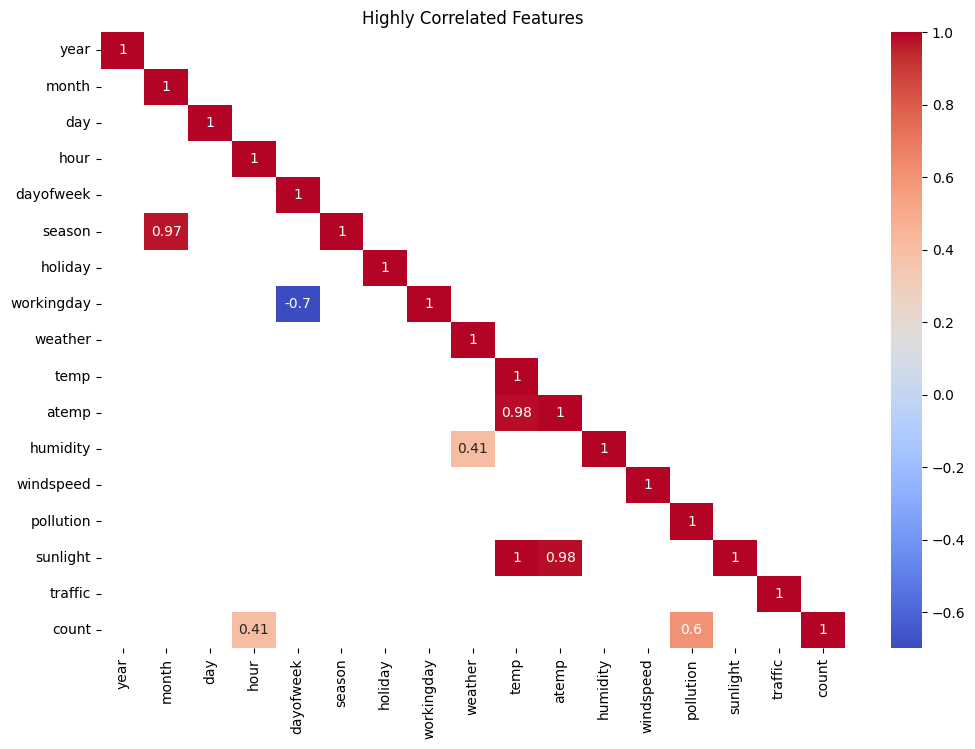

In [324]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set a threshold to identify highly correlated features (e.g., above 0.5 or below -0.5)
threshold = 0.4

# Filter the correlation matrix
high_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Mask to hide the upper triangle of the symmetric correlation matrix
mask = pd.DataFrame(high_corr).isnull()
for i in range(mask.shape[0]):
    mask.iloc[i, i+1:] = True

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Highly Correlated Features')
plt.show()


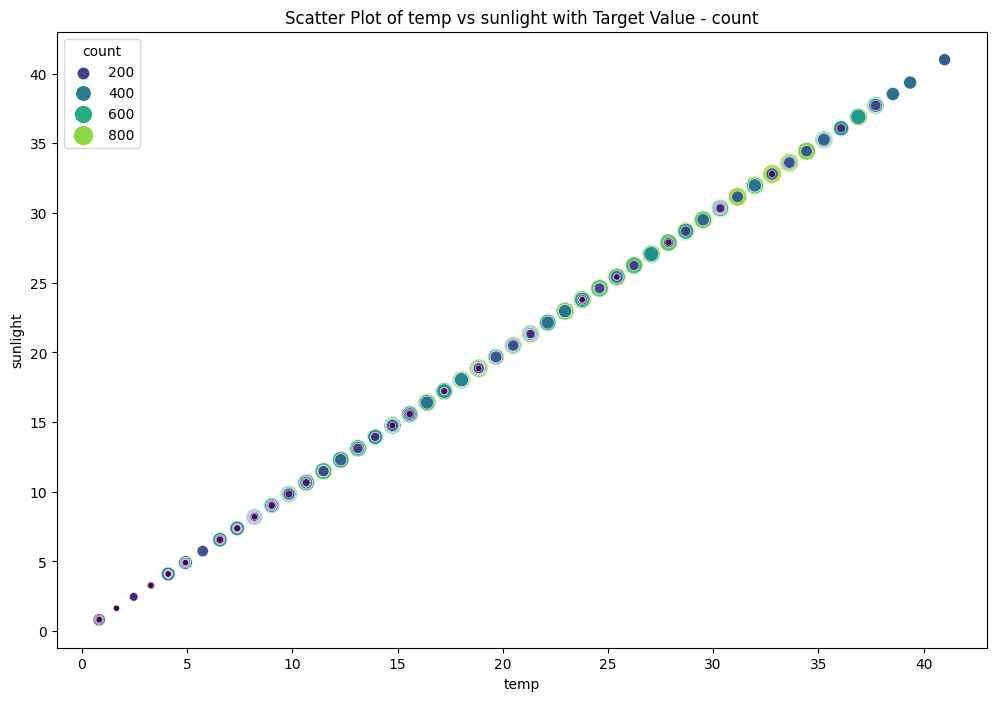

In [364]:
sns.scatterplot(x='temp', y='sunlight', data=df, hue='count', palette='viridis', size='count', sizes=(20, 200))
plt.title('Scatter Plot of temp vs sunlight with Target Value - count')
plt.show()

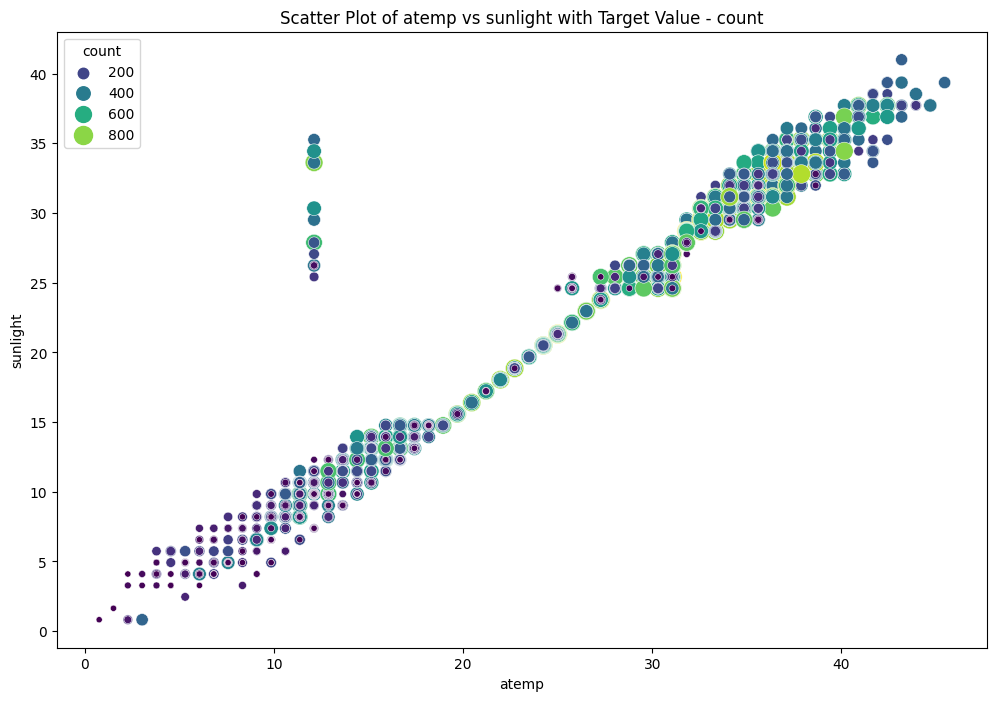

In [367]:
sns.scatterplot(x='atemp', y='sunlight', data=df, hue='count', palette='viridis', size='count', sizes=(20, 200))
plt.title('Scatter Plot of atemp vs sunlight with Target Value - count')
plt.show()

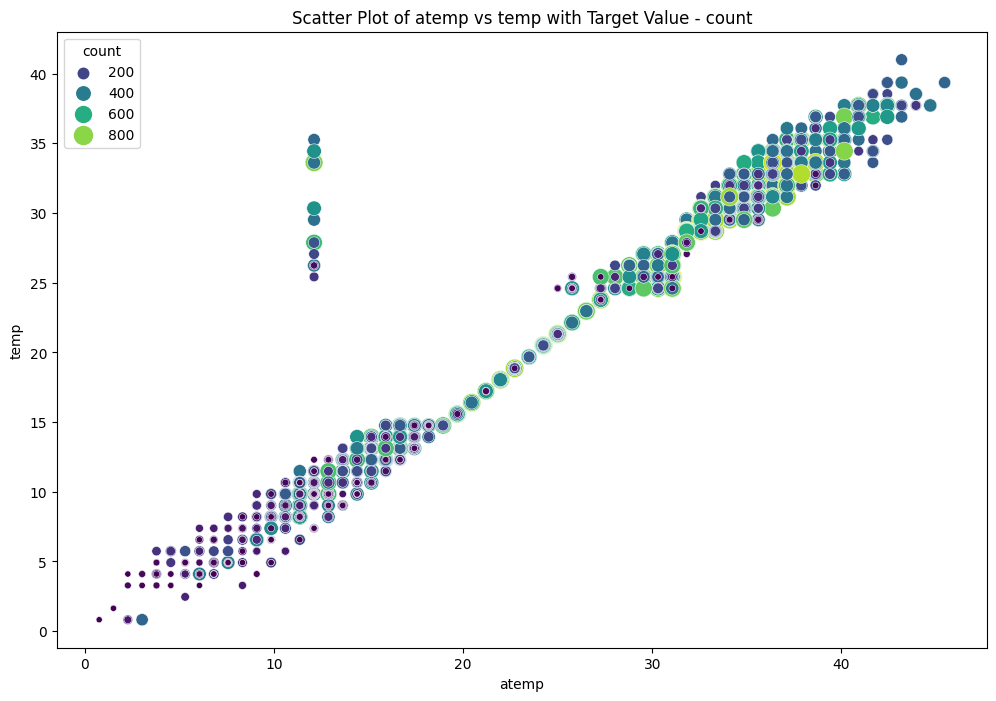

In [368]:
sns.scatterplot(x='atemp', y='temp', data=df, hue='count', palette='viridis', size='count', sizes=(20, 200))
plt.title('Scatter Plot of atemp vs temp with Target Value - count')
plt.show()

We can see that the graph is very simillar to the correlation plot between "atemp" and "sunlight". It is not surprising due to the strong correlation between "temp" and "sunlight". The same outlier that distrupted in the correlation between "atemp" and "sunlight" appears also here.

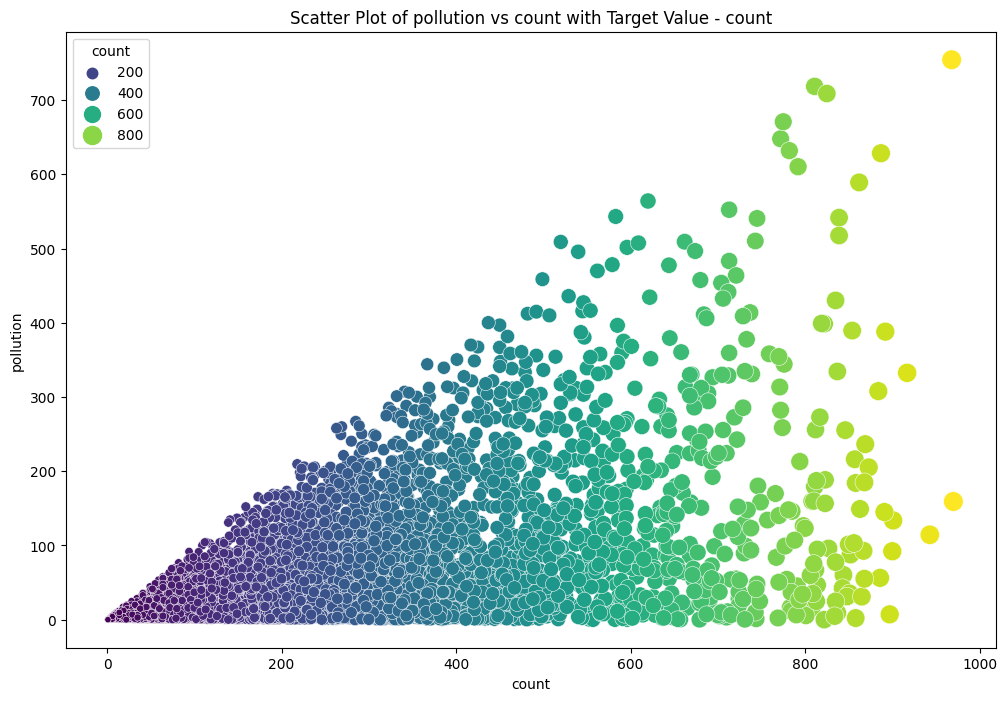

In [369]:
sns.scatterplot(x='count', y='pollution', data=df, hue='count', palette='viridis', size='count', sizes=(20, 200))
plt.title('Scatter Plot of pollution vs count with Target Value - count')
plt.show()


The graph suggests a correlation where higher bike rental counts are associated with increased pollution levels, which is a logical observation.

The correlation heatmap and the graphs indicates that it would be prudent to eliminate the features 'sunlight' and 'temp'. This is due to 'sunlight' and 'temp' having a correlation of 1, and 'temp' and 'atemp' having a correlation of 0.98. Additionally, the feature 'traffic' will be removed owing to its minimal correlation with the target feature. These measures are undertaken with the objective of reducing dimensionality.

### colleration with the target


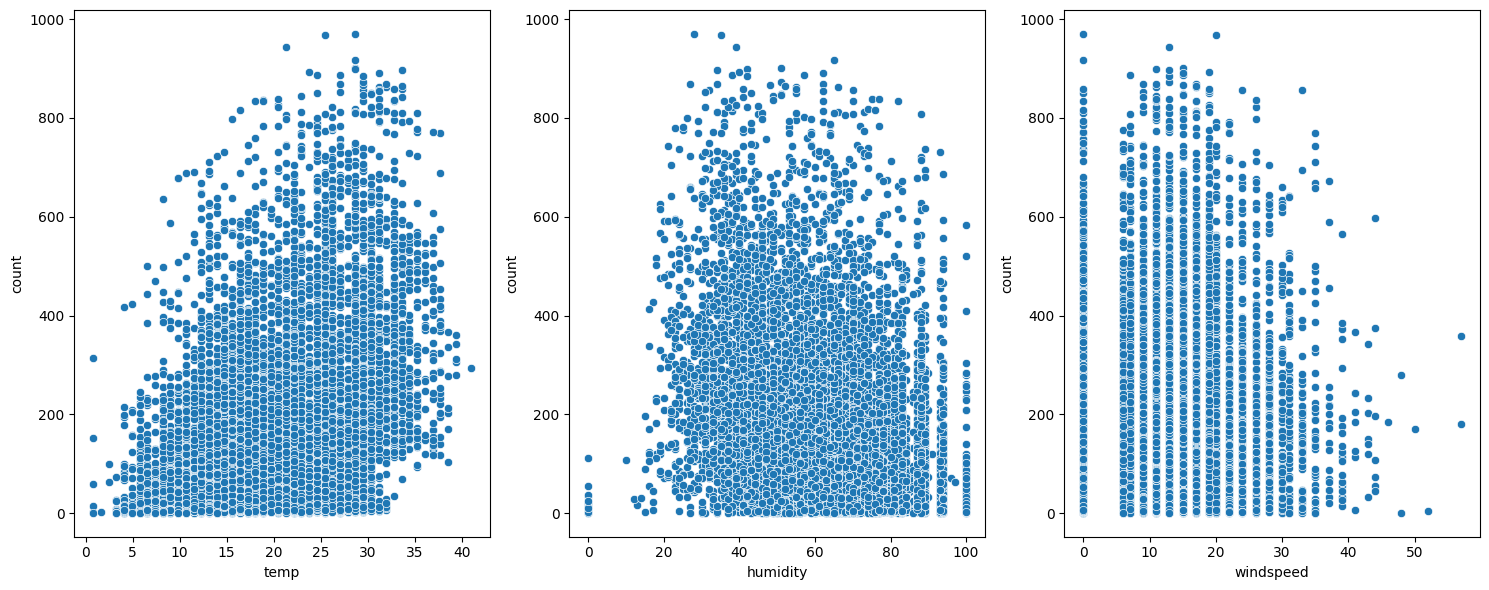

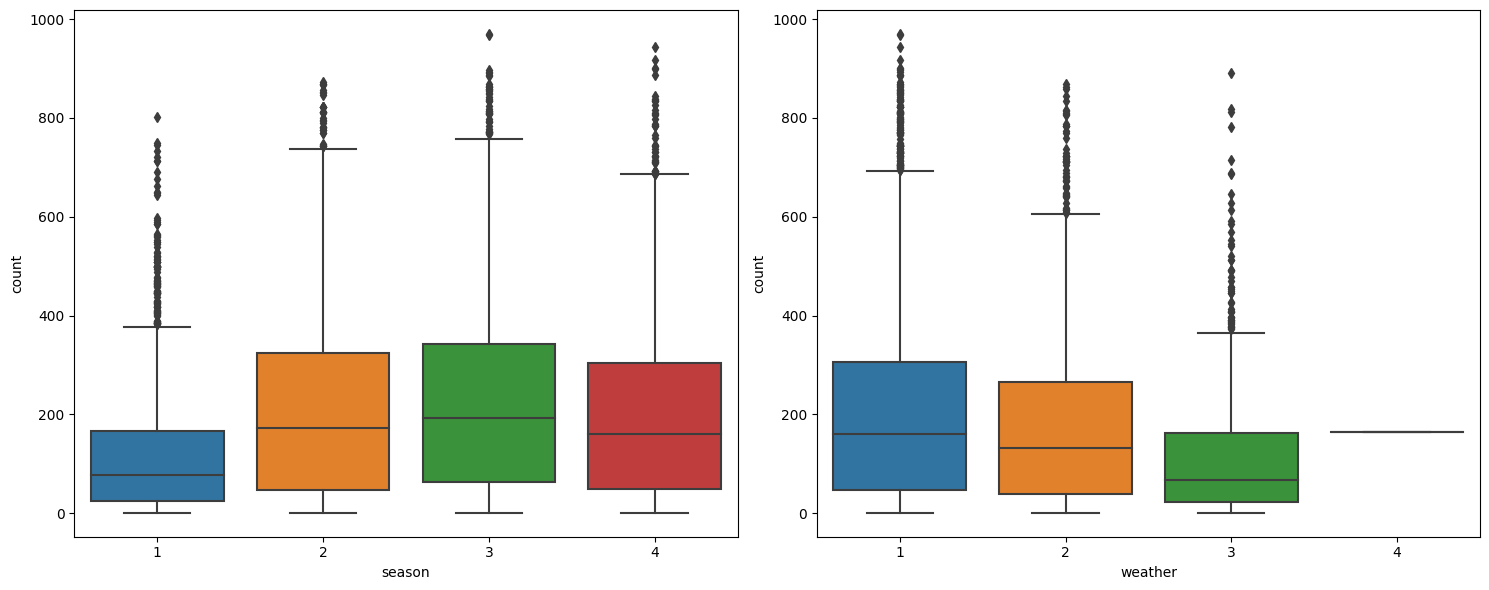

In [325]:
# Scatter plot for continuous variables
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='count', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='humidity', y='count', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='count', data=df)
plt.tight_layout()
plt.show()

# Box plots for categorical variables
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='count', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='weather', y='count', data=df)
plt.tight_layout()
plt.show()


#### These scatter plots does not show any clear/linear relationship and maybe its infulenced by other factors,we will try creating new feature-Comfortable weather that might capture combined effects or specific condtions that can be helpful

in the season and weather wee see that the boxplots are normal and we should just consider removing the outliers (weather number 4 got 1 sample and we should take care of that too)



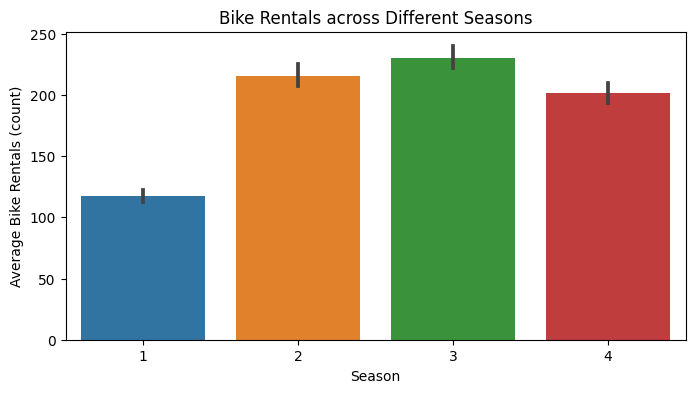

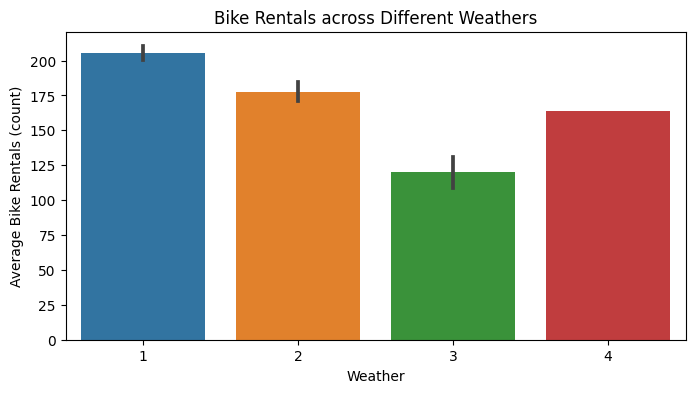

In [326]:

categorical_features = ['season', 'weather']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df[feature], y=df['count'])
    plt.title(f'Bike Rentals across Different {feature.capitalize()}s')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Average Bike Rentals (count)')
    plt.show()


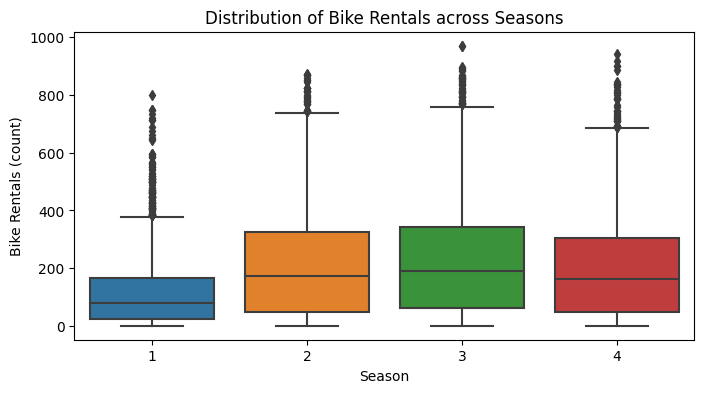

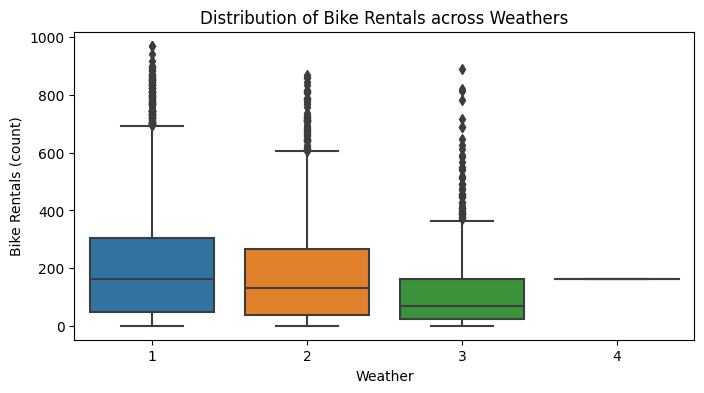

In [327]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], y=df['count'])
    plt.title(f'Distribution of Bike Rentals across {feature.capitalize()}s')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Bike Rentals (count)')
    plt.show()


In [328]:
print(df[df['weather'] == 4].shape[0])
print(df[df['weather'] == 4]['count'])

 #we have only one sample of weather 4 and it got count of 164 bike rentals

1
6484    164
Name: count, dtype: int64


## Part 2- Pre Preproccing


**After Analyzing all the components of weather Now lets create comfortable weather feature- moderate temprature and low humidity and windspeed, weather-1 clear partly cloudy,with normal sunlight**

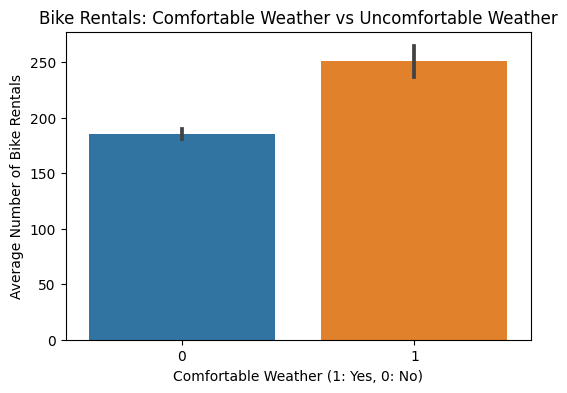

In [329]:
temp_comfortable_low, temp_comfortable_high = df['temp'].quantile([0.25, 0.75])
humidity_comfortable = df['humidity'].quantile(0.60)  # Below 60th percentile
windspeed_comfortable = df['windspeed'].quantile(0.60)  # Below 60th percentile
sunlight_comfortable = df['sunlight'].quantile(0.40)  # Above 40th percentile, if sunlight is a measure of brightness

df['comfortable_weather'] = ((df['weather'] == 1) &
                             (df['temp'] >= temp_comfortable_low) &
                             (df['temp'] <= temp_comfortable_high) &
                             (df['humidity'] <= humidity_comfortable) &
                             (df['windspeed'] <= windspeed_comfortable) &
                             (df['sunlight'] >= sunlight_comfortable)).astype(int)

plt.figure(figsize=(6, 4))
sns.barplot(x='comfortable_weather', y='count', data=df)
plt.title('Bike Rentals: Comfortable Weather vs Uncomfortable Weather')
plt.xlabel('Comfortable Weather (1: Yes, 0: No)')
plt.ylabel('Average Number of Bike Rentals')
plt.show()



In [330]:

# making new features that are specific for each time type
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month


In [331]:
df = df.drop(['temp','sunlight','traffic'], axis=1)
df

year  month  day  hour  dayofweek            datetime  season  holiday  \
0     2011      7   11     0          0 2011-07-11 00:00:00       3        0   
1     2012      5   18    22          4 2012-05-18 22:00:00       2        0   
2     2011      4    1    23          4 2011-04-01 23:00:00       2        0   
3     2012      9   16     9          6 2012-09-16 09:00:00       3        0   
4     2011      2    1    23          1 2011-02-01 23:00:00       1        0   
...    ...    ...  ...   ...        ...                 ...     ...      ...   
8159  2012      1   14     2          5 2012-01-14 02:00:00       1        0   
8160  2011     12   10     9          5 2011-12-10 09:00:00       4        0   
8161  2011     12   18    16          6 2011-12-18 16:00:00       4        0   
8162  2011      2   19     7          5 2011-02-19 07:00:00       1        0   
8163  2012      5    2     7          2 2012-05-02 07:00:00       2        0   

      workingday  weather   atemp  humidity  windspeed  pollution  count  \
0              1        1  32.575        65    12.9980   5.354100     35   
1              1        1  26.515        52    22.0028  85.425233    251   
2              1        1  15.910        61     6.0032   2.040899     53   
3              0        1  27.275        60     8.9981  26.682772    296   
4              1        3   9.850        93    12.9980   5.851754     16   
...          ...      ...     ...       ...        ...        ...    ...   
8159           0        1   8.335        47    11.0014  14.953355     38   
8160           0        1  12.880        61    19.0012   7.977025    149   
8161           0        1  13.635        48    16.9979   6.916512    234   
8162           0        1  19.695        17    35.0008   0.095445     22   
8163           1        2  25.760        88    12.9980  81.965417    358   

      comfortable_weather  
0                       0  
1                       0  
2                       0  
3                       1  
4                       0  
...                   ...  
8159                    0  
8160                    0  
8161                    0  
8162                    0  
8163                    0  

[8164 rows x 16 columns]

### Outliers

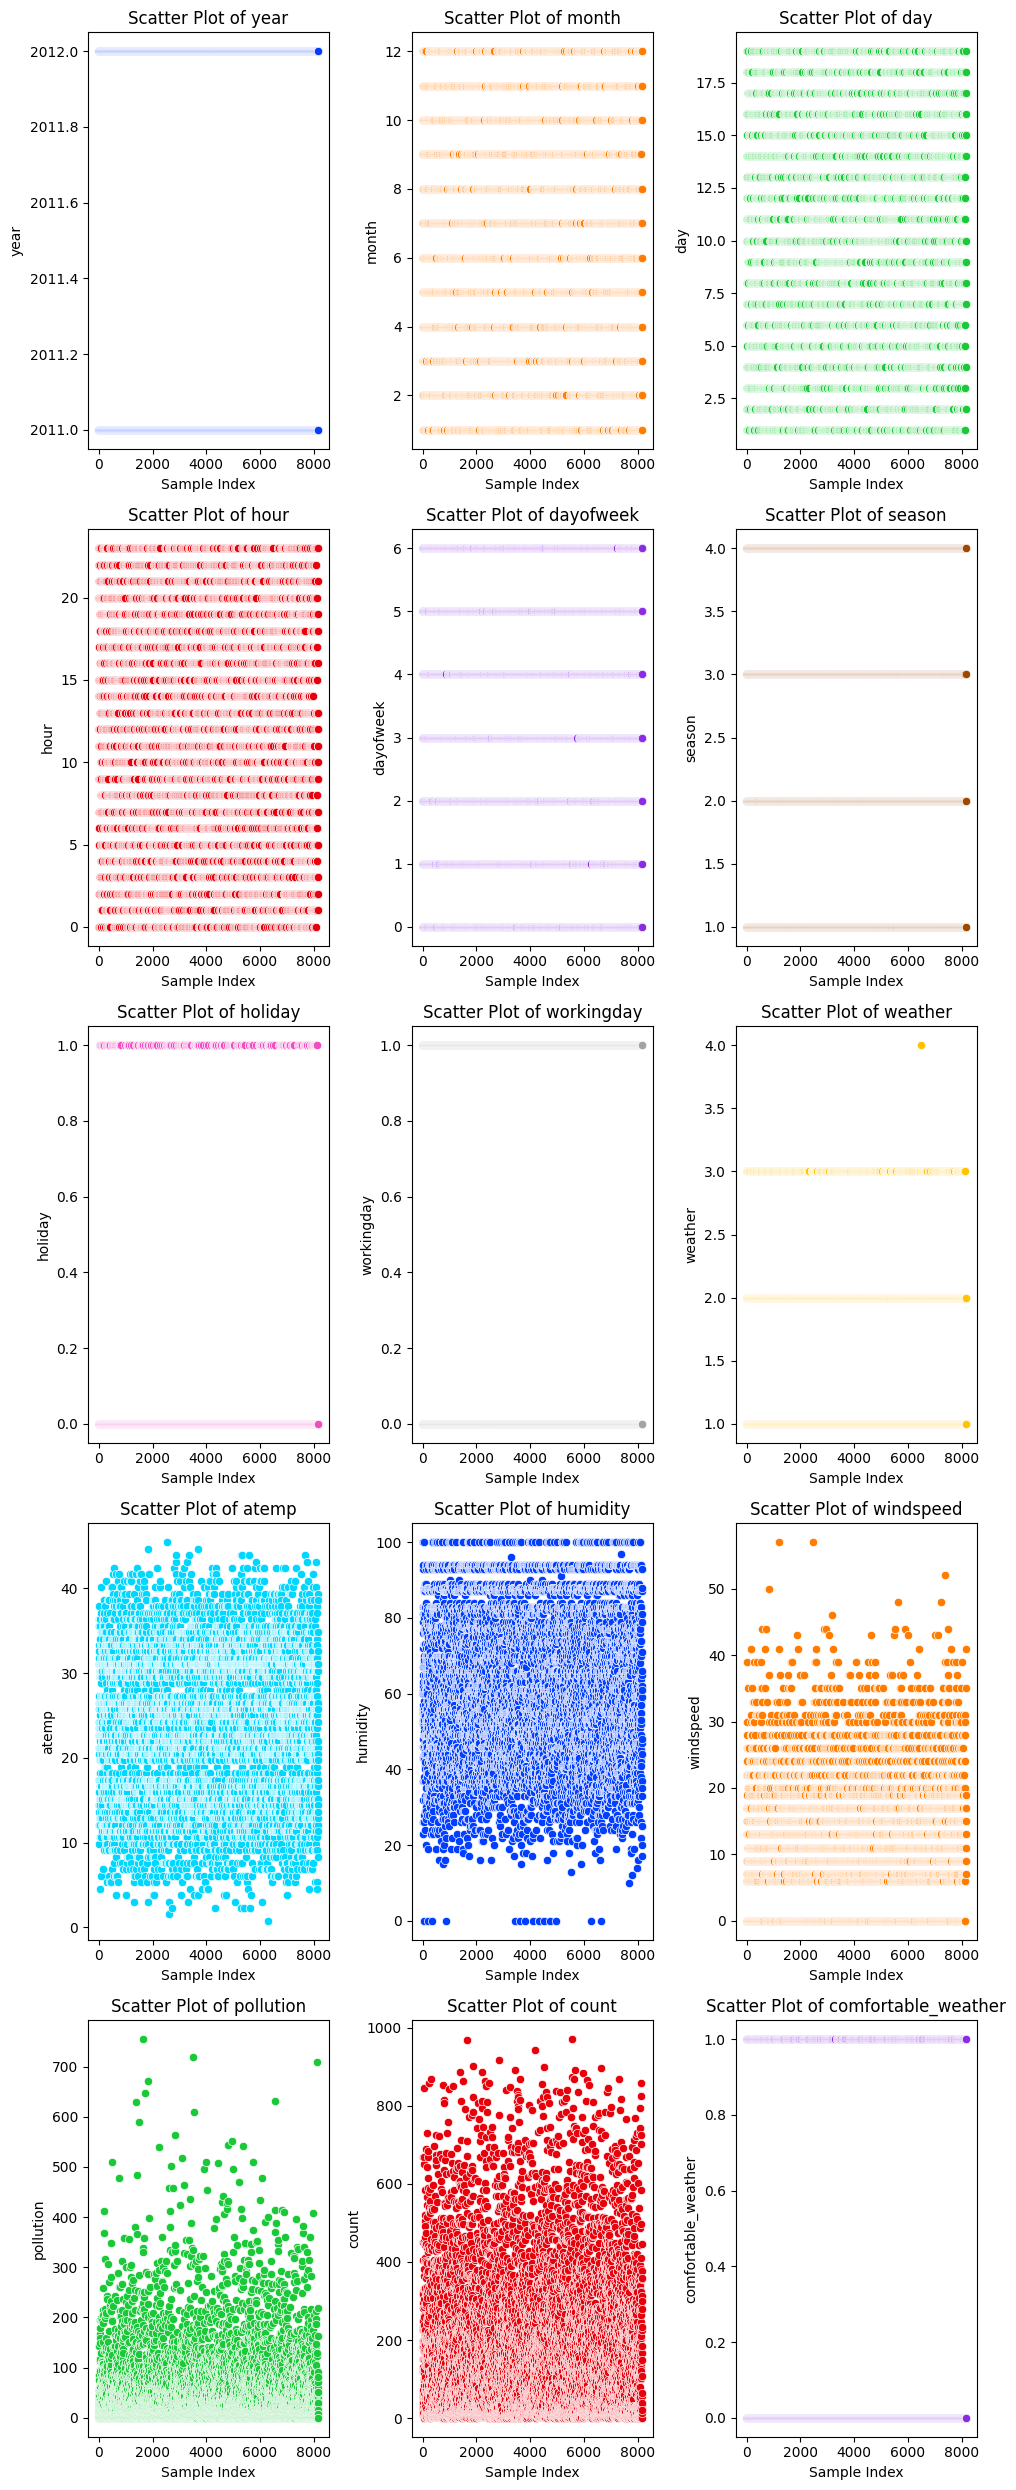

In [332]:
def visualize_outliers_scatter(data):
    """
    Visualizes potential outliers using scatter plots for each numerical feature in the data.

    Parameters:
    data (DataFrame): The dataset to be visualized.

    Returns:
    None: Displays scatter plots of the numerical features.
    """
    # Automatically select numerical features
    numeric_features = data.select_dtypes(include=[int, float]).columns

    num_features = len(numeric_features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols

    # Create the subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))
    axes = axes.flatten()

    # Use a default color palette
    colors = sns.color_palette('bright', n_colors=num_features)

    # Plotting scatter plots for each feature
    for i, feature in enumerate(numeric_features):
        ax = axes[i]
        sns.scatterplot(x=np.arange(len(data)), y=data[feature], ax=ax, color=colors[i])
        ax.set_title(f'Scatter Plot of {feature}')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel(feature)

    # Hide any unused axes
    for i in range(num_features, len(axes)):
        axes[i].set_visible(False)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

visualize_outliers_scatter(df)

The remove_outliers function will be exclusively applied to the 'season' and 'weather' features on a per-category basis, while the winsorize_data function will be utilized for other features demonstrating the presence of outliers.

In [333]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


def winsorize_data(df, column, lower_percentile=0.10, upper_percentile=0.9):
    """
    Apply winsorization to a specified column of a DataFrame.
    It replaces the extreme values with specified percentile values.
    
    :param df: pandas DataFrame
    :param column: the name of the column to winsorize
    :param lower_percentile: the lower percentile value to use for winsorization
    :param upper_percentile: the upper percentile value to use for winsorization
    :return: DataFrame with the specified column winsorized
    """
    df[column] = winsorize(df[column], limits=[lower_percentile, 1 - upper_percentile])
    return df


In [334]:
cleaned_df = pd.DataFrame()


for category in df['weather'].unique():
    category_df = df[df['weather'] == category]
    category_df_cleaned = remove_outliers(category_df, 'count')
    cleaned_df = pd.concat([cleaned_df, category_df_cleaned])
    
for category in df['season'].unique():
    category_df = df[df['season'] == category]
    category_df_cleaned = remove_outliers(category_df, 'count')
    cleaned_df = pd.concat([cleaned_df, category_df_cleaned])


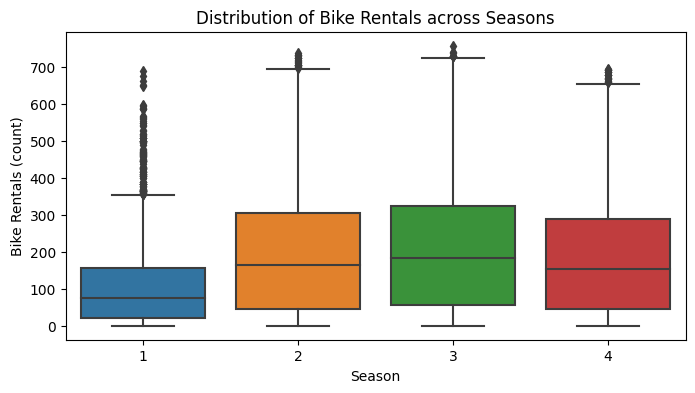

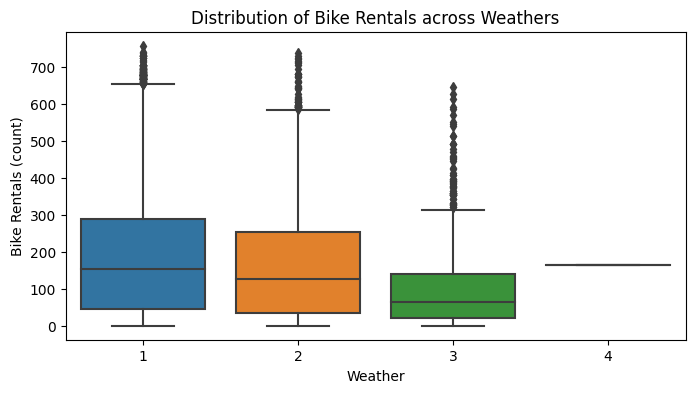

In [335]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cleaned_df[feature], y=cleaned_df['count'])
    plt.title(f'Distribution of Bike Rentals across {feature.capitalize()}s')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Bike Rentals (count)')
    plt.show()



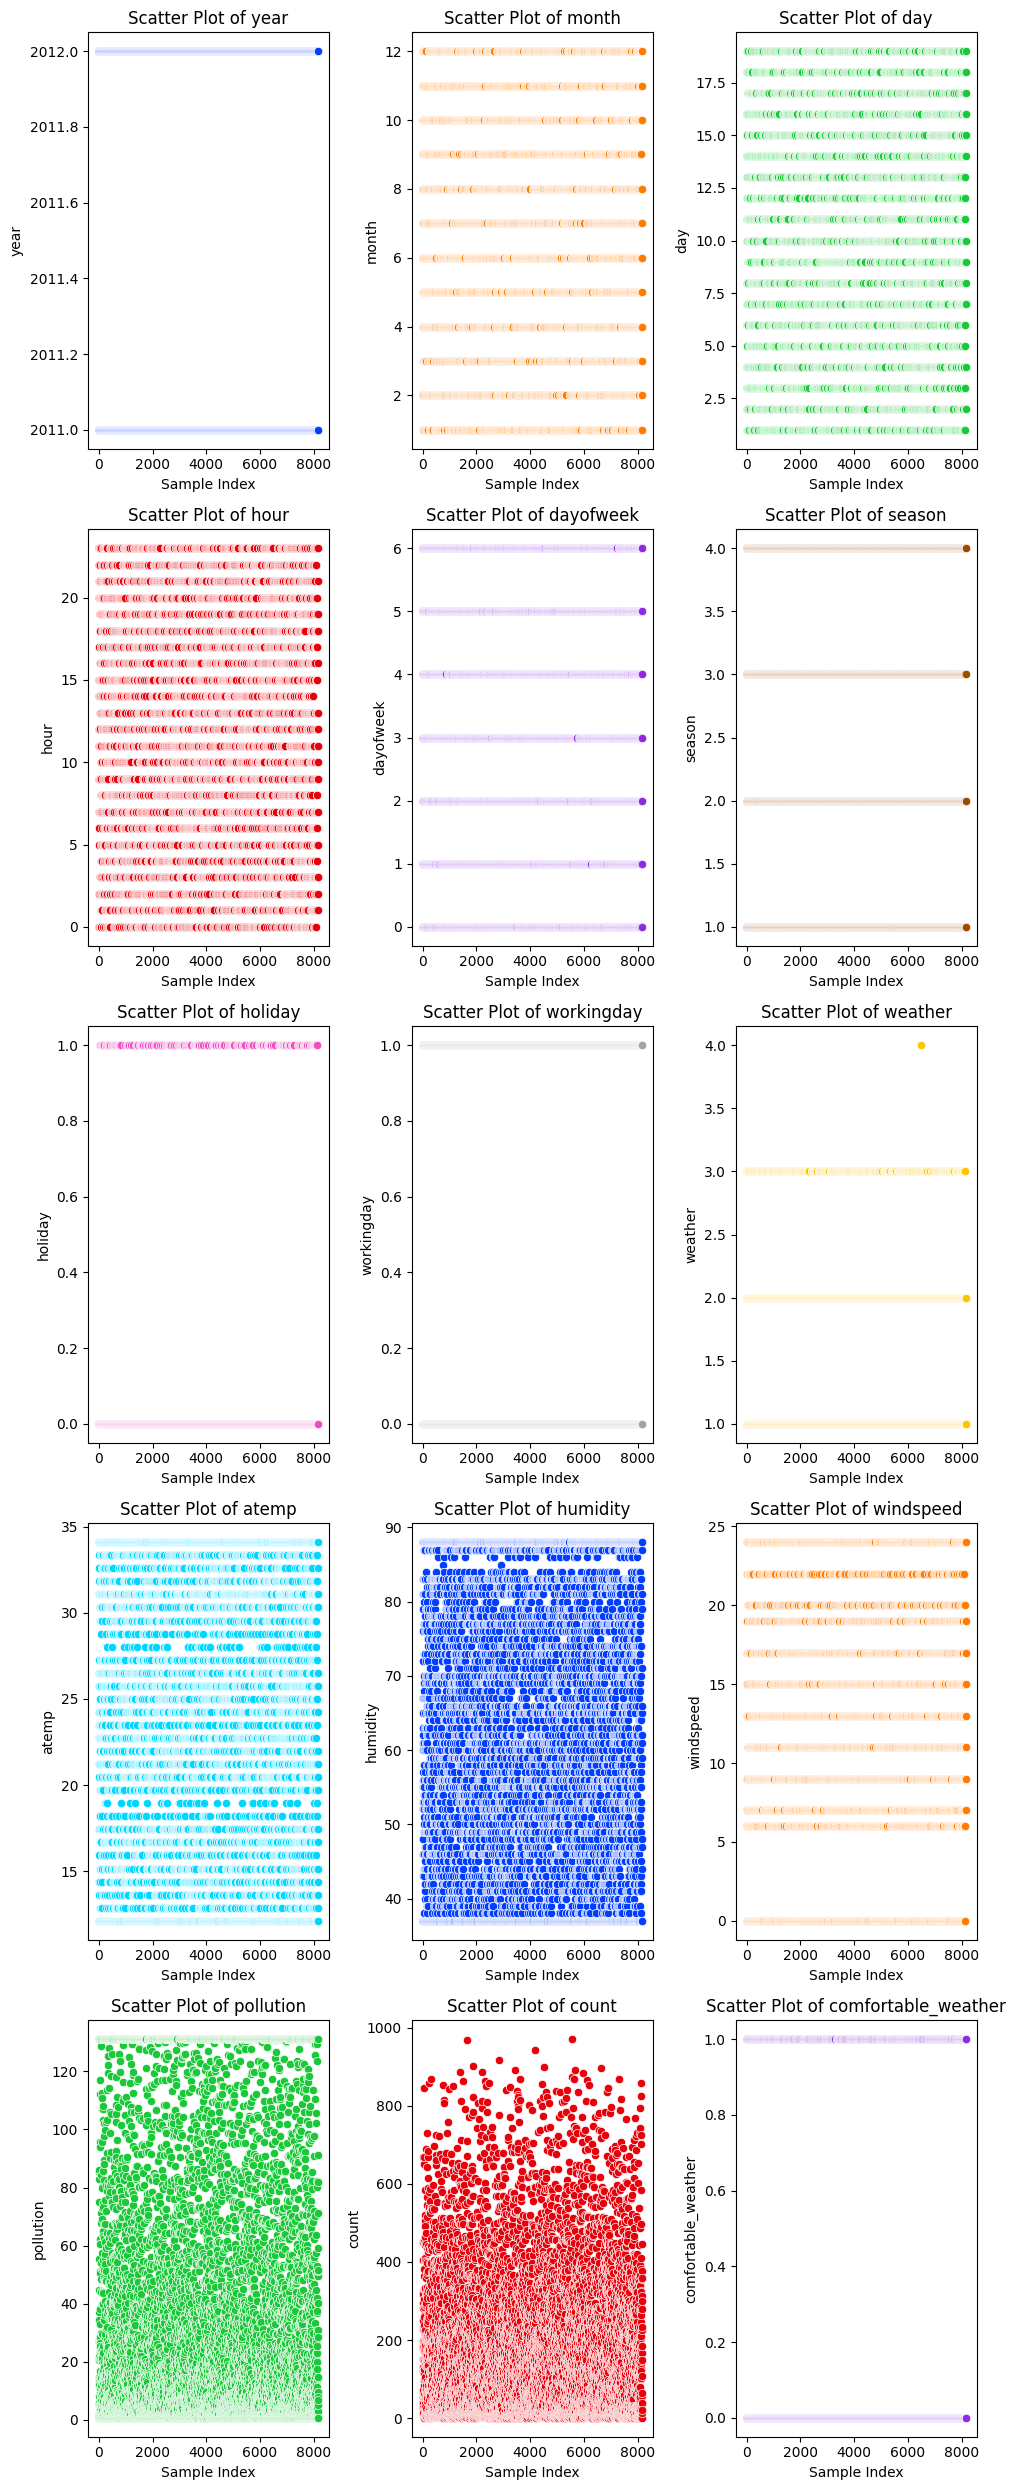

In [346]:
columns = ['atemp', 'humidity','windspeed','pollution']
for column in columns:
    cleaned_df = winsorize_data(cleaned_df, column, lower_percentile=0.10, upper_percentile=0.9)

visualize_outliers_scatter(cleaned_df)


## Part 3- Modeling

In [271]:
X = cleaned_df.drop(['count','datetime'], axis=1)
y = cleaned_df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [272]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 745.1658789987406
Mean Absolute Error: 14.704839420654912
R^2 Score: 0.971061615324188


### Hyperparameter tuning

In [273]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_best)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_best)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_best)}")



Fitting 3 folds for each of 216 candidates, totalling 648 fits


/Users/lilakmuhana/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/lilakmuhana/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/lilakmuhana/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 739.5872532640639
Mean Absolute Error: 14.71652917716205
R^2 Score: 0.9712782602646264


### Feature Importance

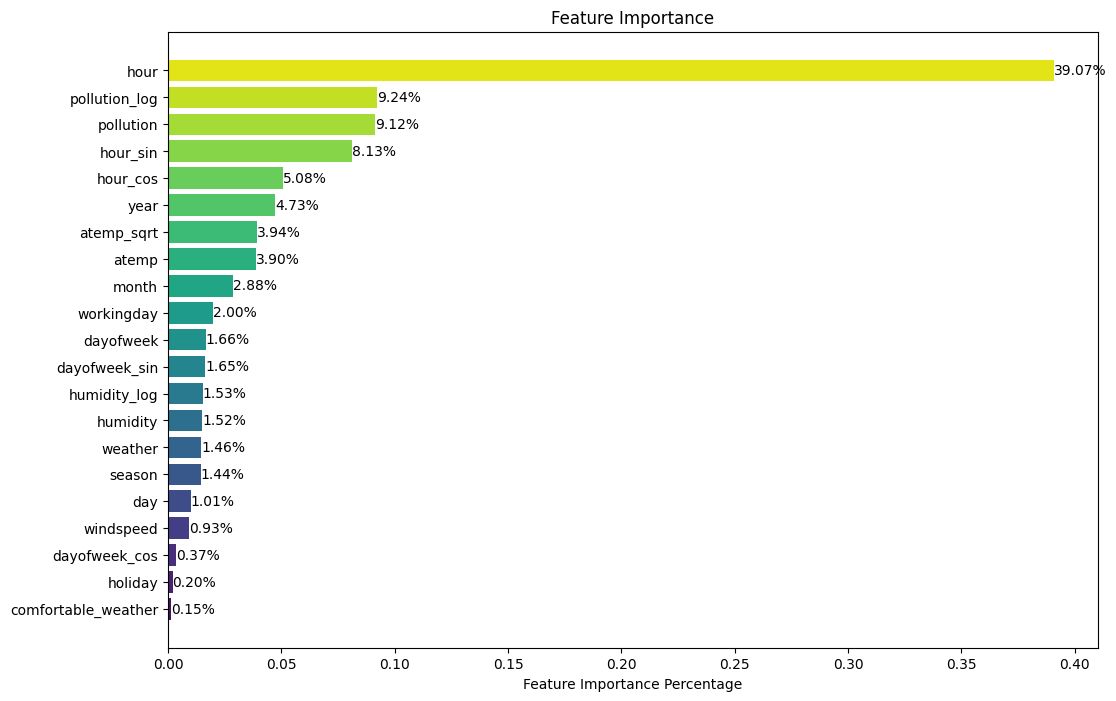

In [338]:
importances = best_rf.feature_importances_
feature_names = X.columns

# Sort the feature importances and corresponding feature names
sorted_indices = np.argsort(importances)
sorted_feature_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Set the figure size
plt.rcParams["figure.figsize"] = (12, 8)

# Create horizontal bar plot
bars = plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center', color=sns.color_palette("viridis", len(sorted_feature_importances)))

# Adding percentage labels to each bar
for bar, importance in zip(bars, sorted_feature_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance*100:.2f}%', ha='left', va='center')

plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.title('Feature Importance')
plt.xlabel('Feature Importance Percentage')
plt.show()

In [339]:

# Hour - Sine and Cosine Transformation
cleaned_df['hour_sin'] = np.sin(cleaned_df['hour'] * (2. * np.pi / 24))
cleaned_df['hour_cos'] = np.cos(cleaned_df['hour'] * (2. * np.pi / 24))

# Pollution - Logarithmic Transformation
cleaned_df['pollution_log'] = np.log(cleaned_df['pollution'] + 1)  # Adding 1 to avoid log(0)

# Atemp - Square Root Transformation (as an example)
cleaned_df['atemp_sqrt'] = np.sqrt(cleaned_df['atemp'])

# Day of the Week - Sine and Cosine Transformation
cleaned_df['dayofweek_sin'] = np.sin(cleaned_df['dayofweek'] * (2. * np.pi / 7))
cleaned_df['dayofweek_cos'] = np.cos(cleaned_df['dayofweek'] * (2. * np.pi / 7))

# Humidity - Logarithmic Transformation (if skewed)
cleaned_df['humidity_log'] = np.log(cleaned_df['humidity'] + 1)


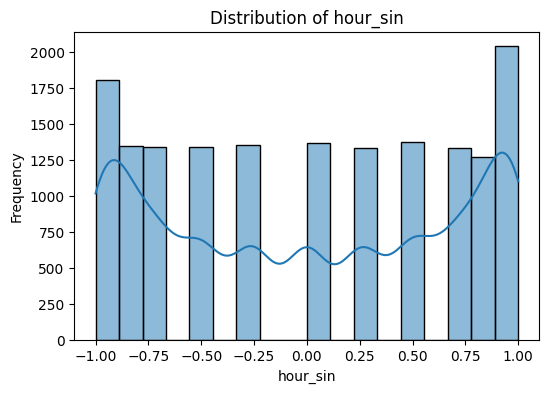

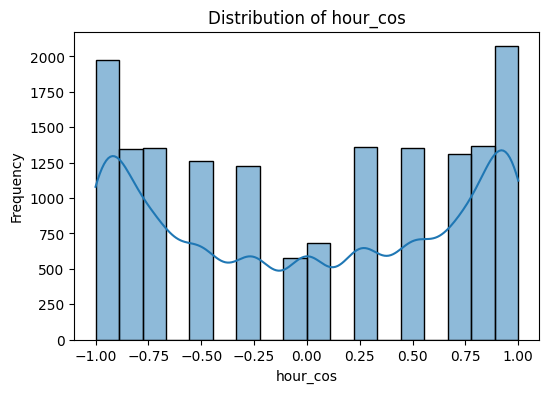

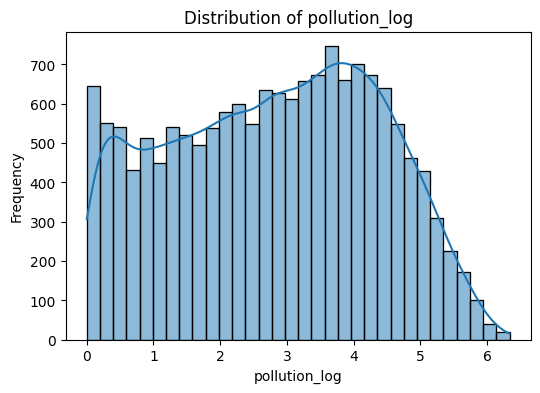

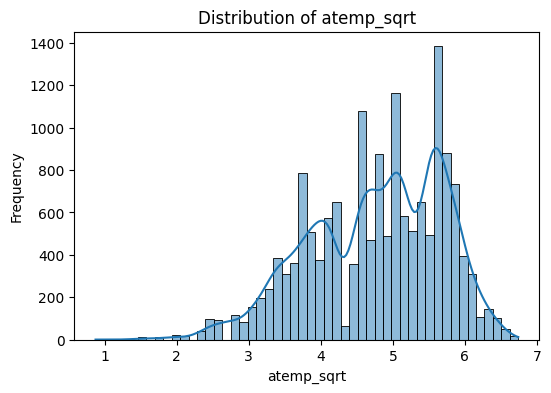

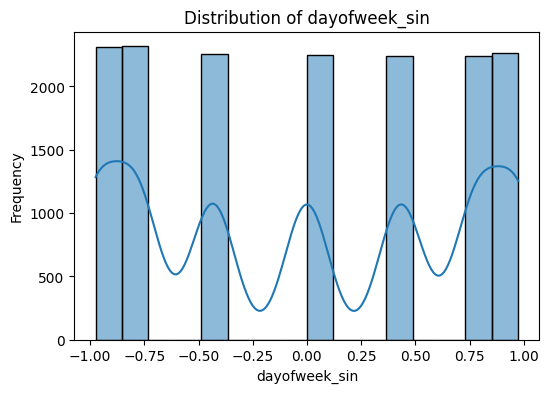

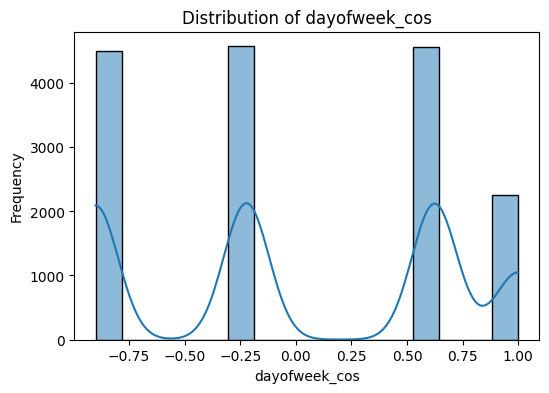

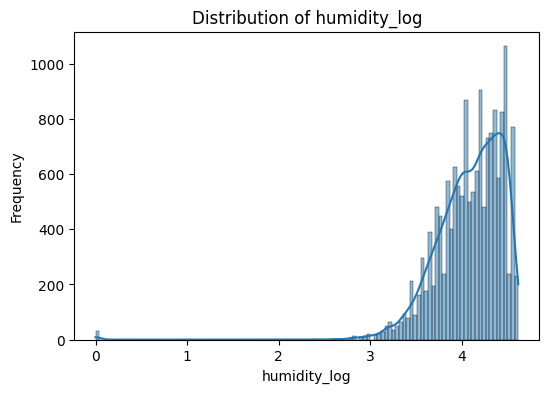

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of transformed features
transformed_features = ['hour_sin', 'hour_cos', 'pollution_log', 'atemp_sqrt', 'dayofweek_sin', 'dayofweek_cos', 'humidity_log']

# Plotting distributions of transformed features
for feature in transformed_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(cleaned_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [277]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features and target variable
X = cleaned_df.drop(['count','datetime'], axis=1)  # Include all original and transformed features
y = cleaned_df['count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf.predict(X_test)
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 745.1658789987406
Mean Absolute Error: 14.704839420654912
R^2 Score: 0.971061615324188


In [278]:
importances = rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot
plt.figure(figsize=(10, 6))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()



ValueError: Length of values (14) does not match length of index (21)

### AdaBoost

In [279]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize AdaBoost Regressor
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                            n_estimators=100, random_state=42)

# Train the model
ada_reg.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_reg.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost - Mean Squared Error: {mse_ada}")
print(f"AdaBoost - Mean Absolute Error: {mae_ada}")
print(f"AdaBoost - R^2 Score: {r2_ada}")


AdaBoost - Mean Squared Error: 438.5903652392947
AdaBoost - Mean Absolute Error: 5.915931989924434
AdaBoost - R^2 Score: 0.9829674209969818


### XGBoost

In [280]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Set the parameters to choose from
XGBoost_parameters = {
    'n_estimators': [1000, 2000],
    'max_depth': [5, 6, 7],
    'alpha': [0, 0.1],
    'learning_rate': [0.05, 0.1, 0.2],
    'random_state': [42]
}

# Run Grid Search
grid_search_XGBoost = GridSearchCV(XGBRegressor(), XGBoost_parameters, cv=3)

# Fit the training data using XGBoost with the best parameters
grid_search_XGBoost.fit(X_train, y_train)

# Get the best parameters
best_param_XGBoost = grid_search_XGBoost.best_params_

# XGBoost Model with the best parameters
best_XGBoost_model = XGBRegressor(**best_param_XGBoost)

# Train the model on the training data
best_XGBoost_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_XGBoost = best_XGBoost_model.predict(X_test)

# Evaluate the model
mse_XGBoost = mean_squared_error(y_test, y_pred_XGBoost)
mae_XGBoost = mean_absolute_error(y_test, y_pred_XGBoost)
r2_XGBoost = r2_score(y_test, y_pred_XGBoost)

print("Best parameters found by GridSearchCV:", best_param_XGBoost)

print("Mean Squared Error on Test Set:", mse_XGBoost)
print(f"Mean Absolute Error: {mae_XGBoost}")
print("R-Squared on Test Set:", r2_XGBoost)

Best parameters found by GridSearchCV: {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 2000, 'random_state': 42}
Mean Squared Error on Test Set: 294.8800587990852
Mean Absolute Error: 6.66907212483258
R-Squared on Test Set: 0.9885483852451483
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   7.3s
[CV] END max_d

# prediction

In [342]:
df_test = pd.read_csv(test_url)

In [344]:
df_test

datetime  season  holiday  workingday  weather   temp  \
0     2011-07-19 11:00:00       3        0           1        1  33.62   
1     2012-01-16 06:00:00       1        1           0        1   4.10   
2     2011-12-11 18:00:00       4        0           0        1   9.84   
3     2012-08-15 10:00:00       3        0           1        2  29.52   
4     2012-06-15 23:00:00       2        0           1        1  25.42   
...                   ...     ...      ...         ...      ...    ...   
2717  2011-03-19 15:00:00       1        0           0        1  20.50   
2718  2012-01-08 16:00:00       1        0           0        1  16.40   
2719  2011-07-11 05:00:00       3        0           1        1  27.06   
2720  2011-07-16 08:00:00       3        0           0        1  27.06   
2721  2011-01-01 12:00:00       1        0           0        1  17.22   

       atemp  humidity  windspeed   pollution  sunlight   traffic  count  
0     40.150        59     0.0000   10.317020    33.621  0.015615    127  
1      6.820        54     6.0032    3.502209     4.101  0.004489     13  
2     11.365        48    12.9980   25.945915     9.841  0.000000    163  
3     34.090        62    12.9980  116.935908    29.521  0.004489    233  
4     31.060        53    16.9979  120.824789    25.421  0.015615    222  
...      ...       ...        ...         ...       ...       ...    ...  
2717  24.240        29    27.9993   44.665581    20.501  0.000242    313  
2718  20.455        37    19.9995   31.090380    16.401  0.000000    314  
2719  31.060        74     8.9981    1.075298    27.061  0.015615     26  
2720  31.060        65    11.0014    2.291586    27.061  0.004489    127  
2721  21.210        77    19.0012    8.940201    17.221  0.015615     84  

[2722 rows x 13 columns]

## applying pre proccesing on Test Data